In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [2]:
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df.head(5)

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [3]:
import numpy as np

In [4]:
#step 1
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')  # Replace with your file path

# Display the first few rows of the dataset
print(df.head())


  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


In [5]:
#step2
# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Display the column names
print("\nColumn Names:")
print(df.columns)

# Examine the data types and non-null values in each column
print("\nData Types and Non-Null Values:")
print(df.info())

# Get a summary of the numeric columns (mean, min, max, std, etc.)
print("\nSummary of Numeric Columns:")
print(df.describe())


Shape of the dataset: (10000, 12)

Column Names:
Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

Data Types and Non-Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null  

Missing values per column:
roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


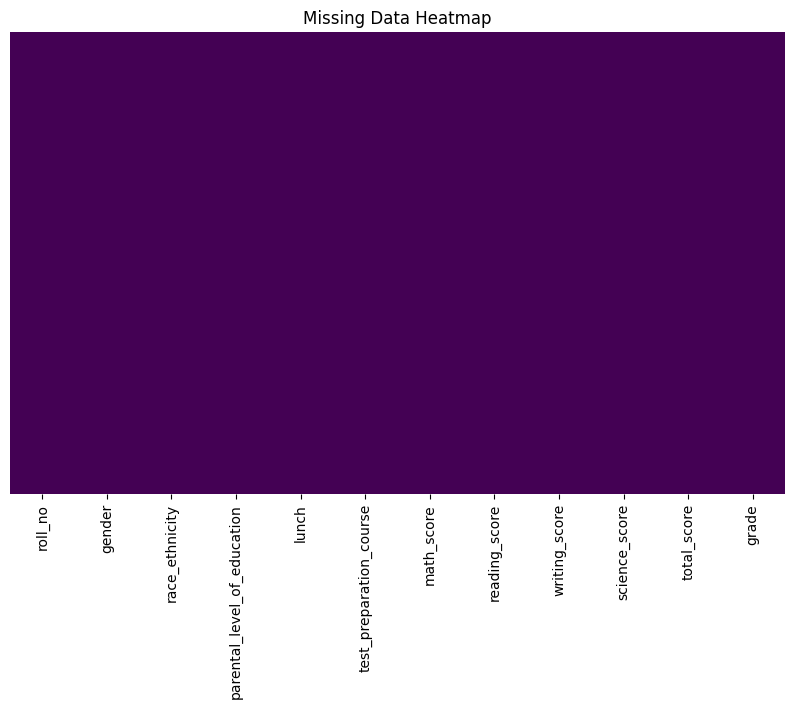


Missing values after imputation:
roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


In [8]:
#step3
# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Step 2: Visualize missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

# Step 3: Handle missing values
# For numeric columns, use median imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, use mode imputation (or "Unknown" as a placeholder)
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify missing values after imputation
missing_values_after = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)


In [9]:
#step4
# 1. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# 2. Drop duplicate rows if any are found
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {df.shape[0]}")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [10]:
#step5
# 1. Examine categorical columns for inconsistencies (e.g., 'Gender', 'Race_Ethnicity', etc.)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display unique values in each categorical column to check for typos or inconsistent values
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

# 2. Ensure numeric columns contain valid numbers
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Check for invalid entries like '?' or negative values
for col in numeric_columns:
    # Convert to numeric, invalid parsing will be coerced to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Check how many NaN values were created after conversion
    print(f"Invalid entries (NaN) in {col}: {df[col].isnull().sum()}")

# Handle NaN values (impute or drop)
# You can decide to drop NaN values or replace them with a suitable value, e.g., mean or median

# Impute NaN values with the median for numeric columns (you can adjust this based on the data type)
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)  # Impute with median

# If you want to drop rows with NaN values (optional)
# df.dropna(inplace=True)

# Verify the data after handling inconsistencies
print("\nData after handling inconsistencies:")
print(df.head())


Unique values in 'roll_no':
['std-01' 'std-02' 'std-03' ... 'std-9998' 'std-9999' 'std-10000']
--------------------------------------------------
Unique values in 'gender':
['male' 'female' 'Boy' '\\tmale' 'Girl']
--------------------------------------------------
Unique values in 'race_ethnicity':
['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
--------------------------------------------------
Unique values in 'parental_level_of_education':
['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
--------------------------------------------------
Unique values in 'math_score':
['89' '65' '10' '22' '26' '40' '34' '25' '28' '71' '55' '27' '29' '18'
 '72' '23' '35' '38' '41' '44' '39' '85' '30' '100' '61' '47' '37' '49'
 '11' '32' '78' '36' '68' '97' '64' '60' '69' '87' '83' '42' '52' '46'
 '12' '51' '75' '20' '81' '98' '24' '82' '19' '48' '74' '43' '62' '21'
 '93' '66' '0' '13' '45' '57' '54' '70

In [18]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [19]:
#step6
# Update this list with the correct column names that you want to drop
irrelevant_columns = ['roll_no', 'gender']  # Example of columns you might want to drop

# Drop these columns from the dataframe
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')  # Ignore errors if columns don't exist

# Verify the dataset after dropping irrelevant columns
print("Data after dropping irrelevant columns:")
print(df.head())


Data after dropping irrelevant columns:
  race_ethnicity parental_level_of_education  lunch  test_preparation_course  \
0        group D                some college    1.0                      1.0   
1        group B                 high school    1.0                      0.0   
2        group C             master's degree    1.0                      0.0   
3        group D                some college    1.0                      1.0   
4        group C                some college    0.0                      1.0   

  math_score  reading_score  writing_score  science_score  total_score grade  
0         89           38.0           85.0           26.0        238.0     C  
1         65          100.0           67.0           96.0        328.0     A  
2         10           99.0           97.0           58.0        264.0     B  
3         22           51.0           41.0           84.0        198.0     D  
4         26           58.0           64.0           65.0        213.0     C  


In [21]:
print(df.columns)


Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [22]:
# Clean column names by stripping spaces and replacing special characters
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\t', '')

# Display cleaned column names
print(df.columns)


Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [23]:
#step7
# Step 1: Check column names to identify any issues
print(df.columns)

# Step 2: Clean column names if there are extra spaces or special characters
df.columns = df.columns.str.strip().str.replace('\n', '').str.replace('\t', '')

# Verify column names again
print(df.columns)

# Step 3: Convert categorical columns to 'category' type
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 
                       'test_preparation_course', 'grade']  # Update this list as needed

for column in categorical_columns:
    if column in df.columns:  # Ensure the column exists
        df[column] = df[column].astype('category')
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Convert numeric columns to appropriate types (int or float)
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 
                   'total_score']  # Update this list as needed

for column in numeric_columns:
    if column in df.columns:  # Ensure the column exists
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric, invalid parsing will result in NaN
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Verify the data types after conversion
print(df.dtypes)


Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
Column 'gender' not found in DataFrame.
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                          category
dtype: object


In [25]:
#step8
# Print the column names to check the exact name of the columns
print(df.columns)


Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [26]:
# Explore Categorical Variables using value_counts

# Race Ethnicity distribution
print("Race Ethnicity Distribution:")
print(df['race_ethnicity'].value_counts())

# Parental Level of Education distribution
print("\nParental Level of Education Distribution:")
print(df['parental_level_of_education'].value_counts())

# Lunch distribution
print("\nLunch Distribution:")
print(df['lunch'].value_counts())

# Test Preparation Course distribution
print("\nTest Preparation Course Distribution:")
print(df['test_preparation_course'].value_counts())

# Grade distribution
print("\nGrade Distribution:")
print(df['grade'].value_counts())


Race Ethnicity Distribution:
race_ethnicity
group C      2944
group D      2566
group B      1899
group E      1509
group A      1062
D               6
E               4
group C\n       4
C               3
A               2
B               1
Name: count, dtype: int64

Parental Level of Education Distribution:
parental_level_of_education
some college          2294
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Name: count, dtype: int64

Lunch Distribution:
lunch
1.0    6451
0.0    3549
Name: count, dtype: int64

Test Preparation Course Distribution:
test_preparation_course
0.0    6122
1.0    3878
Name: count, dtype: int64

Grade Distribution:
grade
B       5662
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

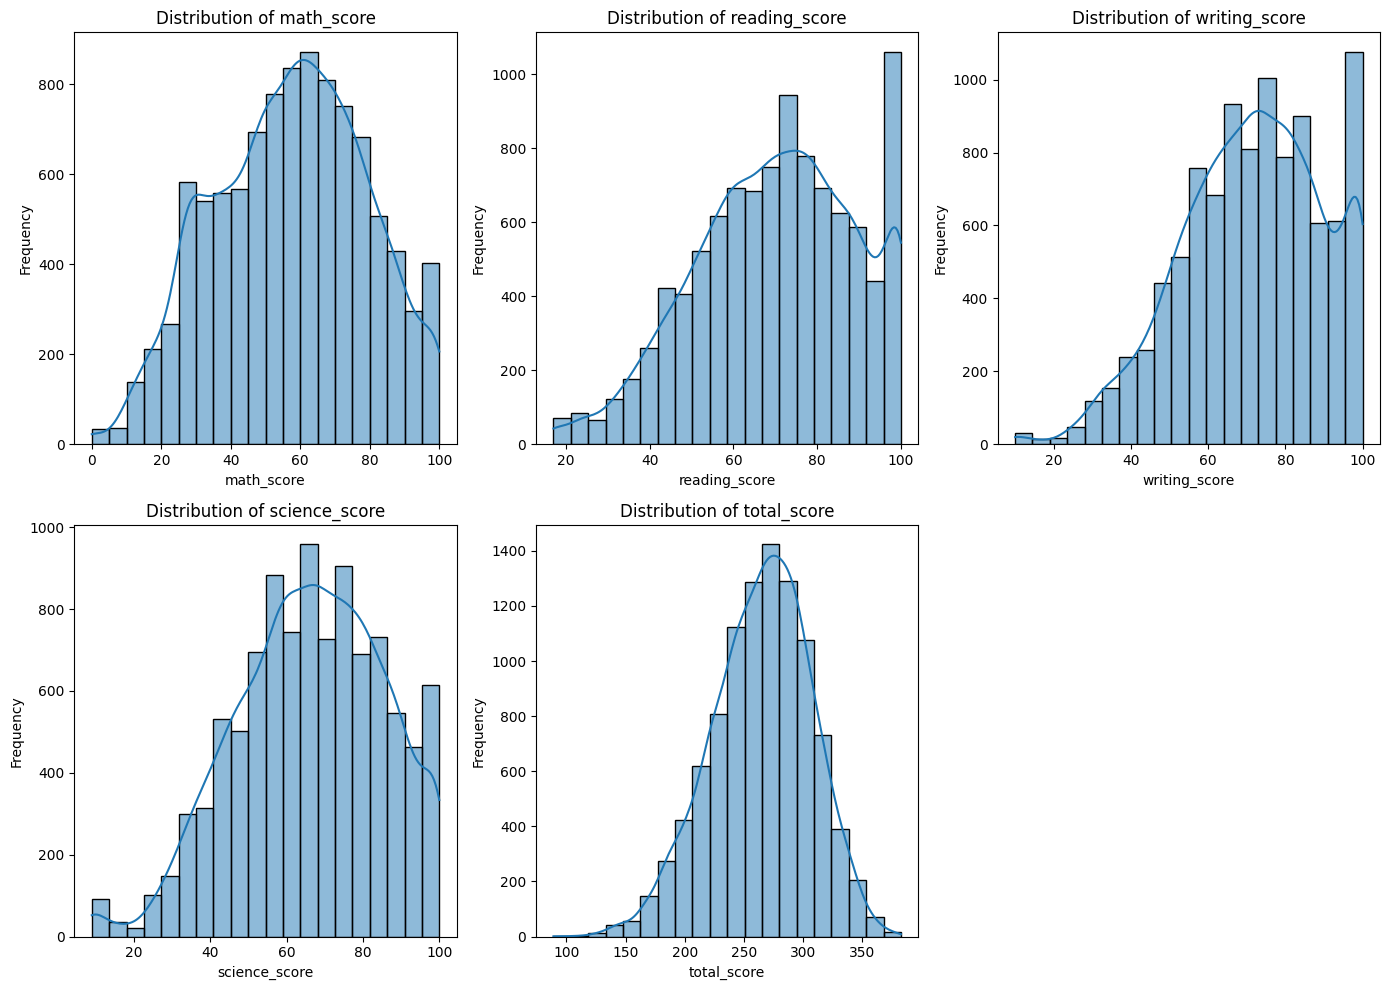

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for the numeric variables
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']

plt.figure(figsize=(14, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Creates a 2x3 grid of subplots
    sns.histplot(df[column], kde=True, bins=20)  # You can adjust the number of bins if necessary
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


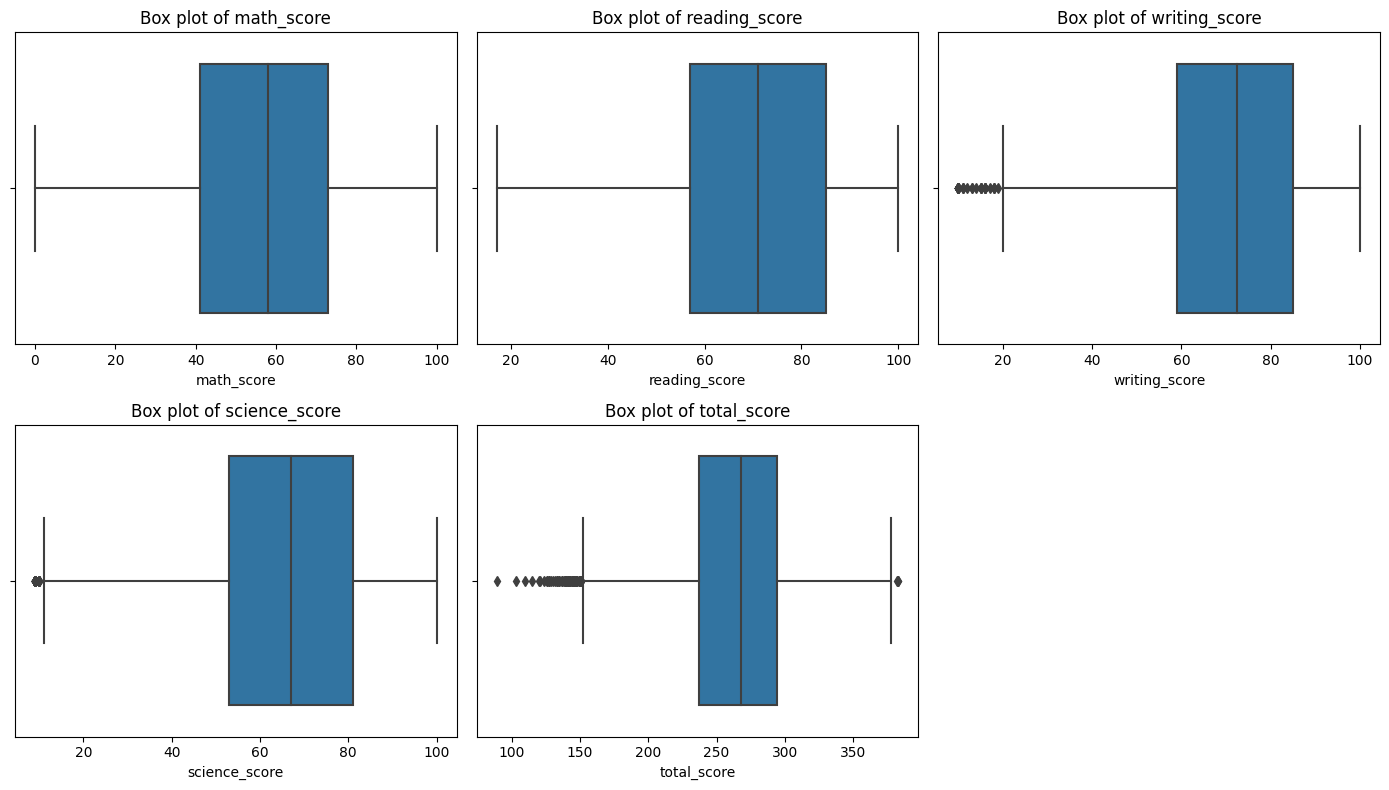

In [28]:
# Use box plots to detect outliers
plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Creates a 2x3 grid of subplots
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


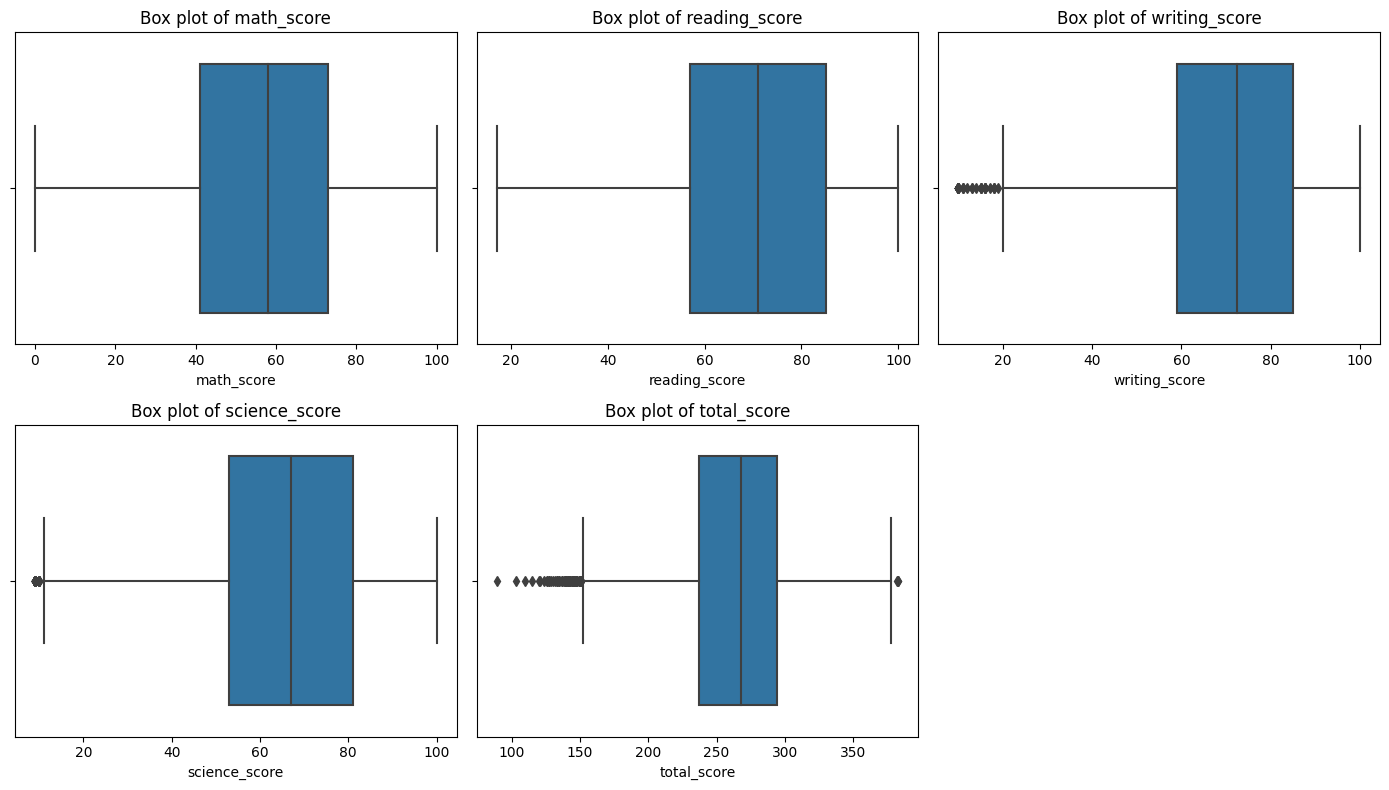

In [29]:
#step9
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for numeric variables to identify potential outliers
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']

plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Creates a 2x3 grid of subplots
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


In [30]:
# Calculate the IQR for each numeric column and identify outliers
def detect_outliers_iqr(df, numeric_columns):
    outliers = {}
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
    return outliers

# Identify outliers using IQR
outliers = detect_outliers_iqr(df, numeric_columns)

# Print the outliers for each numeric column
for column, outlier_data in outliers.items():
    print(f"\nOutliers in {column}:")
    print(outlier_data[[column]])




Outliers in math_score:
Empty DataFrame
Columns: [math_score]
Index: []

Outliers in reading_score:
Empty DataFrame
Columns: [reading_score]
Index: []

Outliers in writing_score:
      writing_score
93             18.0
213            10.0
320            16.0
729            10.0
833            15.0
867            16.0
1097           10.0
1210           10.0
1446           10.0
1478           16.0
1507           11.0
1627           10.0
1824           10.0
1963           12.0
2069           10.0
2301           10.0
2420           10.0
2556           10.0
2824           10.0
2900           10.0
3169           10.0
3253           17.0
3315           10.0
3414           10.0
3527           10.0
3631           16.0
3702           18.0
3704           19.0
3886           16.0
3927           10.0
3984           10.0
4068           13.0
4129           11.0
4152           10.0
4178           10.0
4374           18.0
4492           14.0
4571           10.0
4660           10.0
4710           11.0


In [31]:
# Remove rows containing outliers
def remove_outliers(df, numeric_columns):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the dataset
df_cleaned = remove_outliers(df, numeric_columns)
print("Data after removing outliers:")
print(df_cleaned.describe())


Data after removing outliers:
        math_score  reading_score  writing_score  science_score  total_score
count  9821.000000    9821.000000    9821.000000    9821.000000  9821.000000
mean     57.460238      70.310355      71.902098      66.654516   266.359230
std      21.589806      18.876391      17.694237      18.619348    40.444245
min       0.000000      17.000000      20.000000      11.000000   153.000000
25%      41.000000      57.000000      59.000000      54.000000   239.000000
50%      58.000000      71.000000      73.000000      67.000000   269.000000
75%      73.000000      85.000000      85.000000      81.000000   295.000000
max     100.000000     100.000000     100.000000     100.000000   378.000000


In [32]:
# Cap outliers to the nearest valid value (lower or upper bound)
def cap_outliers(df, numeric_columns):
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the values outside the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers in the dataset
df_capped = cap_outliers(df, numeric_columns)
print("Data after capping outliers:")
print(df_capped.describe())


Data after capping outliers:
        math_score  reading_score  writing_score  science_score   total_score
count  9999.000000   10000.000000   10000.000000   10000.000000  10000.000000
mean     57.106311      70.128100      71.452900      66.079100    264.838050
std      21.771293      19.002495      18.117483      19.261738     41.989431
min       0.000000      17.000000      20.000000      11.000000    151.500000
25%      41.000000      57.000000      59.000000      53.000000    237.000000
50%      58.000000      71.000000      72.500000      67.000000    268.000000
75%      73.000000      85.000000      85.000000      81.000000    294.000000
max     100.000000     100.000000     100.000000     100.000000    379.500000


In [33]:
#step10
# Perform one-hot encoding for categorical columns
df_one_hot = pd.get_dummies(df, columns=['race_ethnicity', 'parental_level_of_education', 'lunch', 
                                         'test_preparation_course', 'grade'], drop_first=True)

# Display the dataframe after one-hot encoding
print("Data after one-hot encoding:")
print(df_one_hot.head())


Data after one-hot encoding:
   math_score  reading_score  writing_score  science_score  total_score  \
0        89.0           38.0           85.0           26.0        238.0   
1        65.0          100.0           67.0           96.0        328.0   
2        10.0           99.0           97.0           58.0        264.0   
3        22.0           51.0           41.0           84.0        198.0   
4        26.0           58.0           64.0           65.0        213.0   

   race_ethnicity_B  race_ethnicity_C  race_ethnicity_D  race_ethnicity_E  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   race_ethnicity_group A  ...  parental_level_of_educati

In [37]:
# Display column names to check for the presence of 'gender' or others
print(df.columns)


Index(['race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Check available categorical columns and encode them
# For example, using 'parental_level_of_education' and 'test_preparation_course'
df['parental_level_of_education_encoded'] = label_encoder.fit_transform(df['parental_level_of_education'])
df['test_preparation_course_encoded'] = label_encoder.fit_transform(df['test_preparation_course'])

# Display the dataframe after label encoding
print(df[['parental_level_of_education', 'parental_level_of_education_encoded', 
          'test_preparation_course', 'test_preparation_course_encoded']].head())


  parental_level_of_education  parental_level_of_education_encoded  \
0                some college                                    4   
1                 high school                                    2   
2             master's degree                                    3   
3                some college                                    4   
4                some college                                    4   

  test_preparation_course  test_preparation_course_encoded  
0                     1.0                                1  
1                     0.0                                0  
2                     0.0                                0  
3                     1.0                                1  
4                     1.0                                1  


In [39]:
# Perform one-hot encoding for categorical columns
df_one_hot = pd.get_dummies(df, columns=['race_ethnicity', 'lunch', 'test_preparation_course'], drop_first=True)

# Display the dataframe after one-hot encoding
print(df_one_hot.head())


  parental_level_of_education  math_score  reading_score  writing_score  \
0                some college        89.0           38.0           85.0   
1                 high school        65.0          100.0           67.0   
2             master's degree        10.0           99.0           97.0   
3                some college        22.0           51.0           41.0   
4                some college        26.0           58.0           64.0   

   science_score  total_score grade  parental_level_of_education_encoded  \
0           26.0        238.0     C                                    4   
1           96.0        328.0     A                                    2   
2           58.0        264.0     B                                    3   
3           84.0        198.0     D                                    4   
4           65.0        213.0     C                                    4   

   test_preparation_course_encoded  race_ethnicity_B  ...  race_ethnicity_D  \
0            

In [42]:
#step11
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                                     math_score  reading_score  writing_score  \
math_score                             1.000000      -0.035439       0.097821   
reading_score                         -0.035439       1.000000       0.024351   
writing_score                          0.097821       0.024351       1.000000   
science_score                          0.085370       0.059656       0.099527   
total_score                            0.577527       0.467744       0.536343   
parental_level_of_education_encoded    0.013026       0.011780       0.005197   
test_preparation_course_encoded        0.042408       0.011516       0.032288   

                                     science_score  total_score  \
math_score                                0.085370     0.577527   
reading_score                             0.059656     0.467744   
writing_score                             0.099527     0.536343   
science_score                             1.000000     0.567996   
total_score     

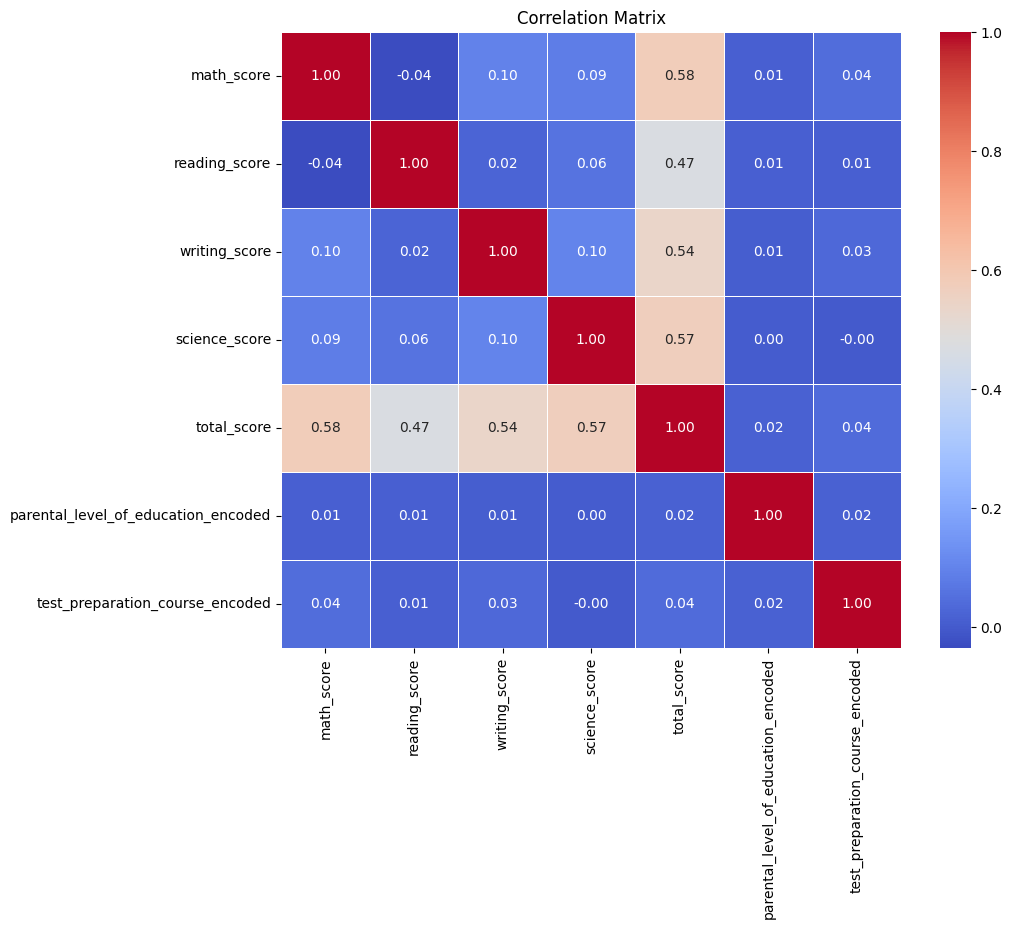

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot for better readability
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()


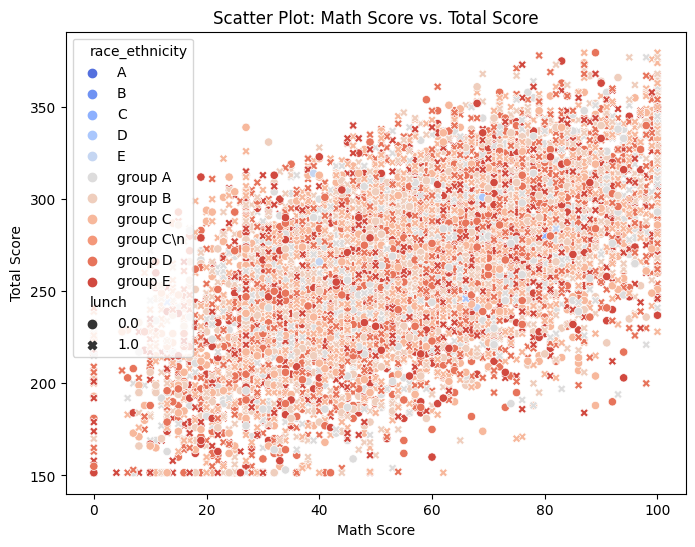

In [46]:
#step12
# Scatter plot to compare math_score vs. total_score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', hue='race_ethnicity', palette='coolwarm', style='lunch')

# Set plot titles and labels
plt.title('Scatter Plot: Math Score vs. Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


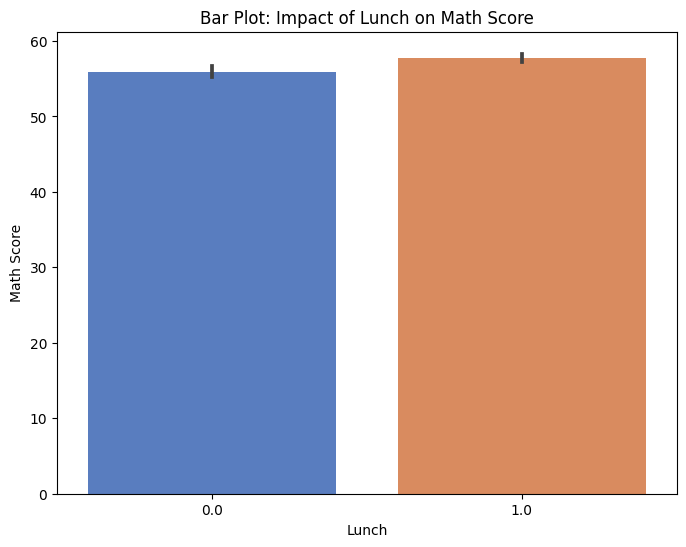

In [47]:
# Bar plot to analyze the impact of lunch on math_score
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='lunch', y='math_score', palette='muted')

# Set plot titles and labels
plt.title('Bar Plot: Impact of Lunch on Math Score')
plt.xlabel('Lunch')
plt.ylabel('Math Score')

# Show the plot
plt.show()



In [48]:
#step13
# Step 1: Create new features

# Assuming the maximum score is 300 (sum of individual scores like math_score + reading_score + writing_score)
max_score = 300
df['performance_ratio'] = df['total_score'] / max_score

# Step 2: Bin numeric columns into categories

# Create bins for math_score
bins = [0, 60, 80, 100]  # Example thresholds: low (0-60), medium (60-80), high (80-100)
labels = ['low', 'medium', 'high']  # Labels for the categories

# Apply pd.cut() to bin the 'math_score' into categories
df['math_score_binned'] = pd.cut(df['math_score'], bins=bins, labels=labels, right=False)

# Similarly, we can bin 'reading_score' and 'writing_score' if desired
df['reading_score_binned'] = pd.cut(df['reading_score'], bins=bins, labels=labels, right=False)
df['writing_score_binned'] = pd.cut(df['writing_score'], bins=bins, labels=labels, right=False)

# Display the first few rows to check the new features
print(df[['math_score', 'performance_ratio', 'math_score_binned', 'reading_score_binned', 'writing_score_binned']].head())


   math_score  performance_ratio math_score_binned reading_score_binned  \
0        89.0           0.793333              high                  low   
1        65.0           1.093333            medium                  NaN   
2        10.0           0.880000               low                 high   
3        22.0           0.660000               low                  low   
4        26.0           0.710000               low                  low   

  writing_score_binned  
0                 high  
1               medium  
2                 high  
3                  low  
4               medium  


In [ ]:
#step14
#Conclusion and Next Steps
#The exploratory data analysis has provided valuable insights into the dataset, revealing several patterns and correlations, such as:

#The significant impact of test preparation on student performance.
#The relationship between parental education and student success.
#The potential influence of socioeconomic factors on academic outcomes.
#To move forward:

#Missing Data Handling: The missing values (e.g., in gender) should be handled appropriately.
#Outlier Management: Extreme outliers in test scores should be addressed to avoid skewing future analyses.
#Statistical Testing: Conduct statistical tests like t-tests or ANOVA to further investigate relationships between variables, such as between lunch type and test scores.
#Further predictive modeling could be performed using features such as performance_ratio or binned scores to assess their usefulness in forecasting student outcomes.